## Практична робота 7

### Завдання 1

Зчитати архів  Customer Shopping Trends Dataset

Далі працюємо з файлом shopping_trends.csv

Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип стовпців.  

Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases".  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Зчитання файлу shopping_trends.cvs
data = pd.read_csv("excel/shopping_trends.csv", encoding="latin1")

print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [ ]:
#Перевірка розміру, типу стовпців та пропусків
print("Розмір таблиці: \n", data.shape)

print("\n Тип даних: \n", data.dtypes)

print("\n Кількість пропусків: \n", data.isnull().sum())

Розмір таблиці: 
 (3900, 19)

 Тип даних: 
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

 Кількість пропусків: 
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                   

1. Застосуйте алгоритм K-means для кластеризації даних:

Для цього потрібно виконати:

I. Підготовка даних:

- Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

- Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [ ]:
data = data[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]

#Масштабування даних
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)
print(data_scale)

[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


II. Визначення кількості кластерів:

- Використайте метод ліктя, щоб визначити оптимальну кількість кластерів. Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів. Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.

- Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

- Кластеризація за допомогою K-means:

- Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.

- Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.

In [ ]:
#Метод ліктя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scale)
    wcss.append(kmeans.inertia_)

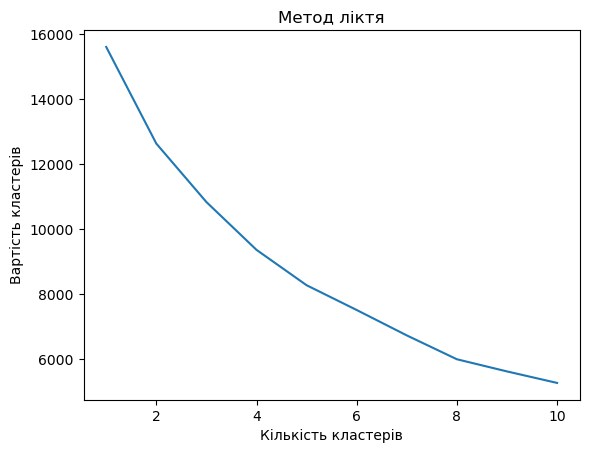

In [ ]:
#Графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку"
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.show()

In [ ]:
#Кластеризація за допомогою K-means
optimal_cluster = 3
kmeans = KMeans(n_clusters=optimal_cluster, init="k-means++", max_iter=300, n_init=10, random_state=0)
data["Cluster"] = kmeans.fit_predict(data_scale)

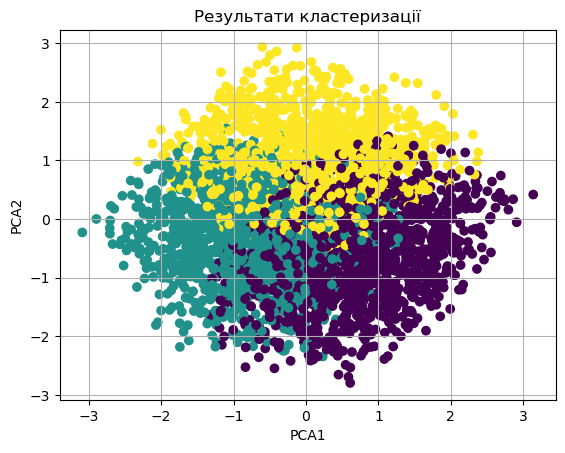

In [ ]:
#Візуалізації даних
pca = PCA(n_components=3)
data_r = pca.fit_transform(data_scale)
data['PCA1'] = data_r[:, 0]
data['PCA2'] = data_r[:, 1]

plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'])
plt.title('Результати кластеризації')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

Під час виконання завдання 1 Практичної роботи №7, отримано досвід використання Методу ліктя для визначення оптимальної кількості кластерів, а також виконано кластеризацію з використанням методу K-means.